In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('1.png')  
points = []

def click_and_crop(event, x, y, flags, param):
    global points
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)  
        cv2.imshow("image", image)

cv2.imshow("image", image)
cv2.setMouseCallback("image", click_and_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Mission Done 🎉")

# Assign points to each lane (you should click the points in the following order):
# 1. Left lane top edge
# 2. Left lane right edge
# 3. Left lane bottom edge
# 4. Left lane left edge
# 5. Right lane top edge
# 6. Right lane right edge
# 7. Right lane bottom edge
# 8. Right lane left edge
if len(points) == 8:
    #------------ Create a mask with the left lane and right lane polygons ------------
    vertices_left = np.array([points[0], points[1], points[2], points[3]], dtype=np.int32)
    vertices_right = np.array([points[4], points[5], points[6], points[7]], dtype=np.int32)
    #------------ Create a mask for the left lane ------------
    mask_left = np.zeros_like(image)
    cv2.fillPoly(mask_left, [vertices_left], (255, 255, 255))       # Fill the left lane ROI with white
    #------------ Create a mask for the right lane ------------
    mask_right = np.zeros_like(image)
    cv2.fillPoly(mask_right, [vertices_right], (255, 255, 255))     # Fill the right lane ROI with white
    #------------ Combine both masks ------------
    final_mask = cv2.bitwise_or(mask_left, mask_right)
    #------------ Apply the mask on the image to get the region of interest ------------
    roi = cv2.bitwise_and(image, final_mask)
    #------------ Display the final image with ROI ------------
    cv2.imshow("ROI Image", roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("You need to click exactly 8 points (4 for left lane, 4 for right lane).")


Mission Done 🎉


In [3]:
vertices_left

array([[639, 243],
       [436, 241],
       [109, 683],
       [611, 724]])

In [4]:
vertices_right

array([[692, 253],
       [801, 251],
       [959, 733],
       [695, 742]])

<body>
    <div style = "
        width: 100%;
        height: 25px;
        background: linear-gradient(to right, #000000, #800000, #000000);">
    </div>
</body>
<!--   #800080;   -->

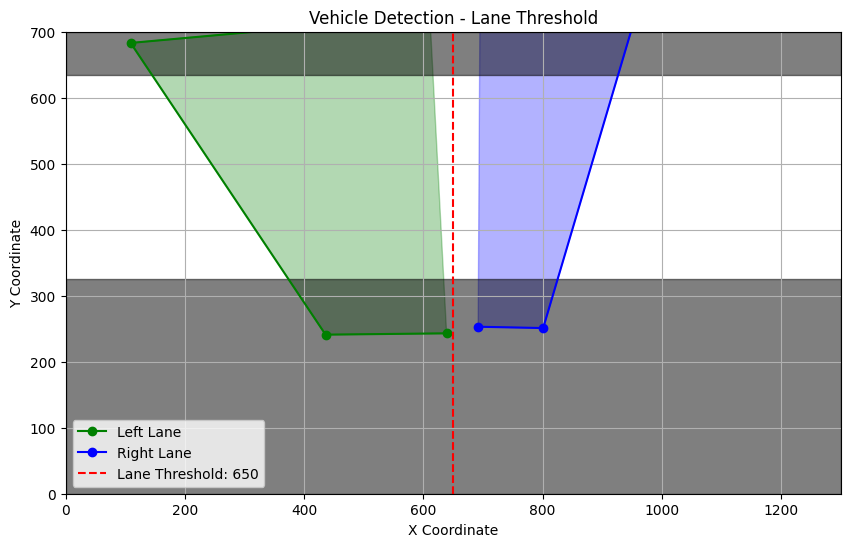

In [8]:
x1, x2 = 325, 635
lane_threshold = 650
plt.figure(figsize=(10, 6))
plt.plot(vertices_left[:, 0], vertices_left[:, 1], label="Left Lane", color='green', marker='o')
plt.plot(vertices_right[:, 0], vertices_right[:, 1], label="Right Lane", color='blue', marker='o')
plt.fill(vertices_left[:, 0], vertices_left[:, 1], color='green', alpha=0.3)
plt.fill(vertices_right[:, 0], vertices_right[:, 1], color='blue', alpha=0.3)
plt.fill_betweenx([0, x1], 0, 1300, color='black', alpha=0.5)
plt.fill_betweenx([x2, 700], 0, 1300, color='black', alpha=0.5)
plt.axvline(x=lane_threshold, color='red', linestyle='--', label=f"Lane Threshold: {lane_threshold}")
plt.title("Vehicle Detection - Lane Threshold")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.xlim(0, 1300)
plt.ylim(0, 700)
plt.show()

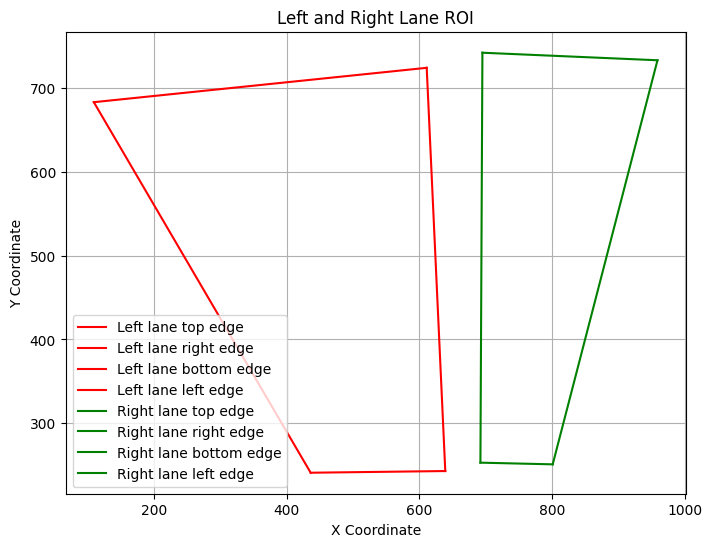

In [9]:
plt.figure(figsize=(8, 6))
plt.plot([vertices_left[0][0], vertices_left[1][0]], [vertices_left[0][1], vertices_left[1][1]], 'r-', label='Left lane top edge')  # Top edge of the left lane
plt.plot([vertices_left[1][0], vertices_left[2][0]], [vertices_left[1][1], vertices_left[2][1]], 'r-', label='Left lane right edge')  # Right edge of the left lane
plt.plot([vertices_left[2][0], vertices_left[3][0]], [vertices_left[2][1], vertices_left[3][1]], 'r-', label='Left lane bottom edge')  # Bottom edge of the left lane
plt.plot([vertices_left[3][0], vertices_left[0][0]], [vertices_left[3][1], vertices_left[0][1]], 'r-', label='Left lane left edge')  # Left edge of the left lane

plt.plot([vertices_right[0][0], vertices_right[1][0]], [vertices_right[0][1], vertices_right[1][1]], 'g-', label='Right lane top edge')  # Top edge of the right lane
plt.plot([vertices_right[1][0], vertices_right[2][0]], [vertices_right[1][1], vertices_right[2][1]], 'g-', label='Right lane right edge')  # Right edge of the right lane
plt.plot([vertices_right[2][0], vertices_right[3][0]], [vertices_right[2][1], vertices_right[3][1]], 'g-', label='Right lane bottom edge')  # Bottom edge of the right lane
plt.plot([vertices_right[3][0], vertices_right[0][0]], [vertices_right[3][1], vertices_right[0][1]], 'g-', label='Right lane left edge')  # Left edge of the right lane
plt.title("Left and Right Lane ROI")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()